# PREDICTING HOUSES PRICES USING ADVANCED REGRESSION TECHNIQUES

1.IMPORTING THE NECESSARY LIBRARIES

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

2.LOADING THE DATA INTO THE DATASET

In [18]:
data = pd.read_csv('USA_Housing.csv')
# Generate dataset description for numerical columns
numeric_description = data.describe()

# Generate dataset description for all columns (including categorical)
all_description = data.describe(include='all')

# Print the descriptions
print("Summary Statistics for Numerical Columns:")
print(numeric_description)

print("\nSummary Statistics for All Columns:")
print(all_description)

Summary Statistics for Numerical Columns:
       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min   

3.DATA PREPROCESSING AND FEATURE SELECTION

In [19]:
# Remove the 'Address' feature
data = data.drop('Address', axis=1)

# Separate the features (X) and target variable (y)
X = data.drop('Price', axis=1)  # Assuming 'Price' is the target variable
y = data['Price']

4.SPLIT THE DATA INTO TRAINING AND TESTING SETS

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5.MODEL SELECTION

In [21]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)

# Elastic Net Regression
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net_model.fit(X_train, y_train)
elastic_net_predictions = elastic_net_model.predict(X_test)

# Polynomial Regression
poly_degree = 2  # We can adjust the degree as needed
poly_features = PolynomialFeatures(degree=poly_degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)
poly_regression_model = Ridge(alpha=1.0)  
poly_regression_model.fit(X_poly_train, y_train)
poly_predictions = poly_regression_model.predict(X_poly_test)

# Decision Tree Regression
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_predictions = decision_tree_model.predict(X_test)

# Gradient Boosting Regression
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gradient_boosting_model.fit(X_train, y_train)
gradient_boosting_predictions = gradient_boosting_model.predict(X_test)

# XGBoost Regression
xgboost_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgboost_model.fit(X_train, y_train)
xgboost_predictions = xgboost_model.predict(X_test)

C:\Users\ELCOT\AppData\Local\Programs\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.14364e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


6.MODEL EVALUATION

In [22]:
# Evaluate the models
def evaluate_model(predictions, model_name):
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"{model_name} MSE: {mse:.2f}")
    print(f"{model_name} R^2: {r2:.2f}")

print("Ridge Regression Results:")
evaluate_model(ridge_predictions, "Ridge")

print("\nLasso Regression Results:")
evaluate_model(lasso_predictions, "Lasso")

print("\nElastic Net Regression Results:")
evaluate_model(elastic_net_predictions, "Elastic Net")

print("\nPolynomial Regression Results:")
evaluate_model(poly_predictions, "Polynomial Regression")

print("\nDecision Tree Regression Results:")
evaluate_model(decision_tree_predictions, "Decision Tree")

print("\nGradient Boosting Regression Results:")
evaluate_model(gradient_boosting_predictions, "Gradient Boosting")

print("\nXGBoost Regression Results:")
evaluate_model(xgboost_predictions, "XGBoost")

Ridge Regression Results:
Ridge MSE: 10089716572.55
Ridge R^2: 0.92

Lasso Regression Results:
Lasso MSE: 10089021397.17
Lasso R^2: 0.92

Elastic Net Regression Results:
Elastic Net MSE: 15561491345.78
Elastic Net R^2: 0.87

Polynomial Regression Results:
Polynomial Regression MSE: 10098957596.70
Polynomial Regression R^2: 0.92

Decision Tree Regression Results:
Decision Tree MSE: 31568012111.93
Decision Tree R^2: 0.74

Gradient Boosting Regression Results:
Gradient Boosting MSE: 11983338273.94
Gradient Boosting R^2: 0.90

XGBoost Regression Results:
XGBoost MSE: 12045241000.49
XGBoost R^2: 0.90


7.VISUALIZING THE MODELS

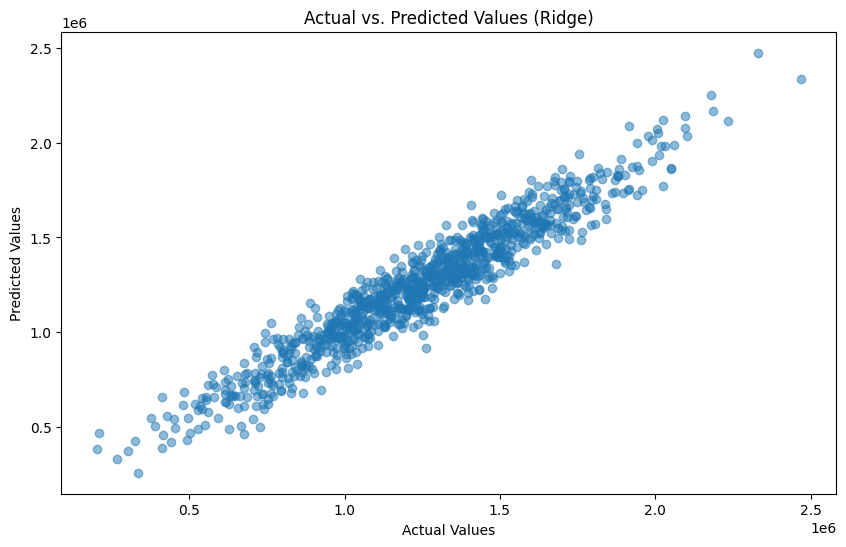

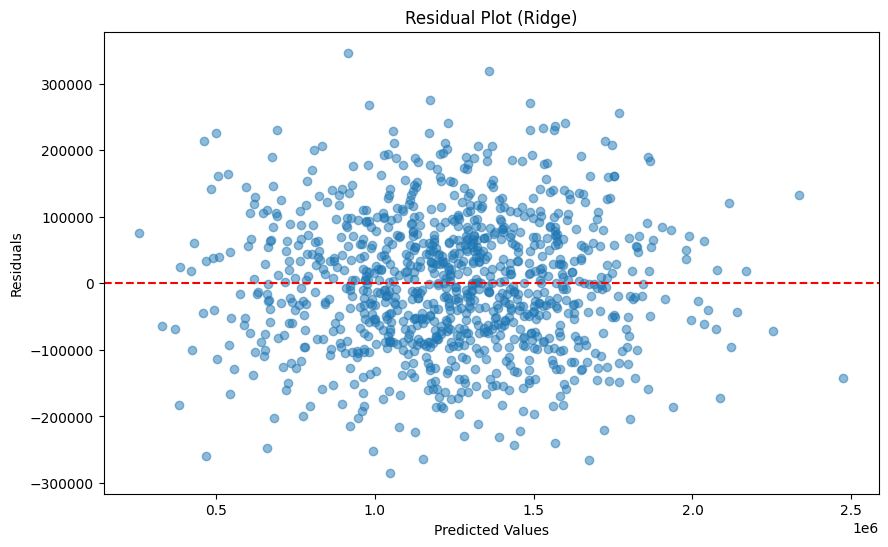

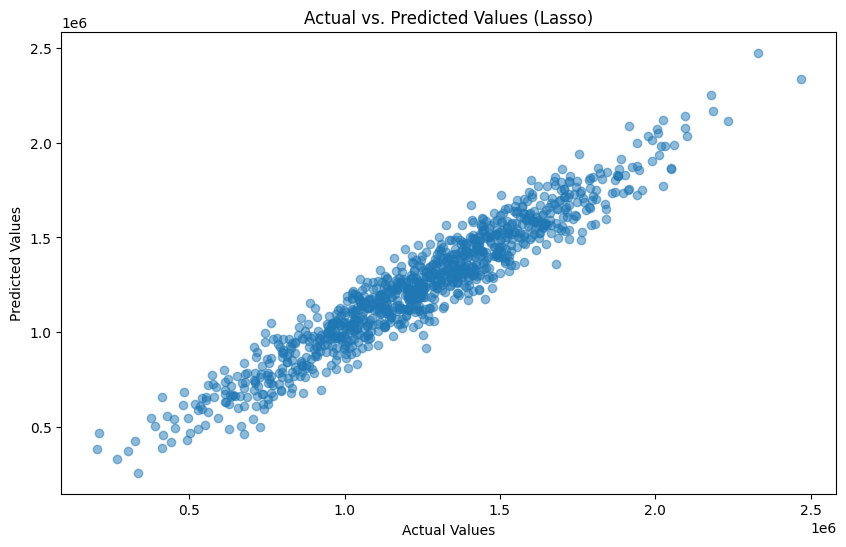

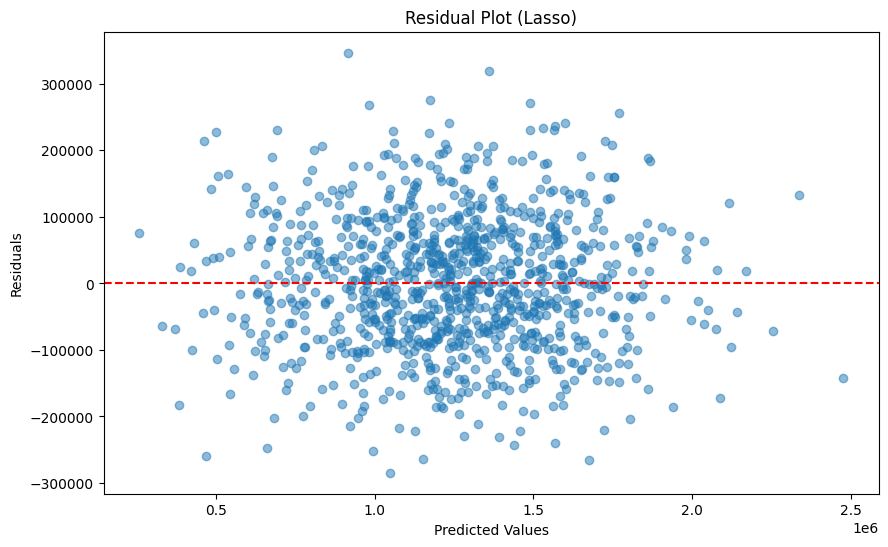

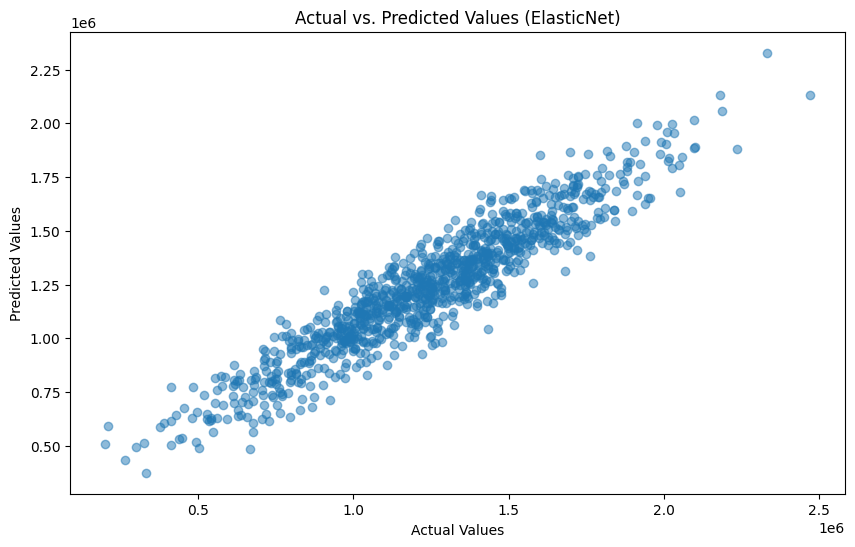

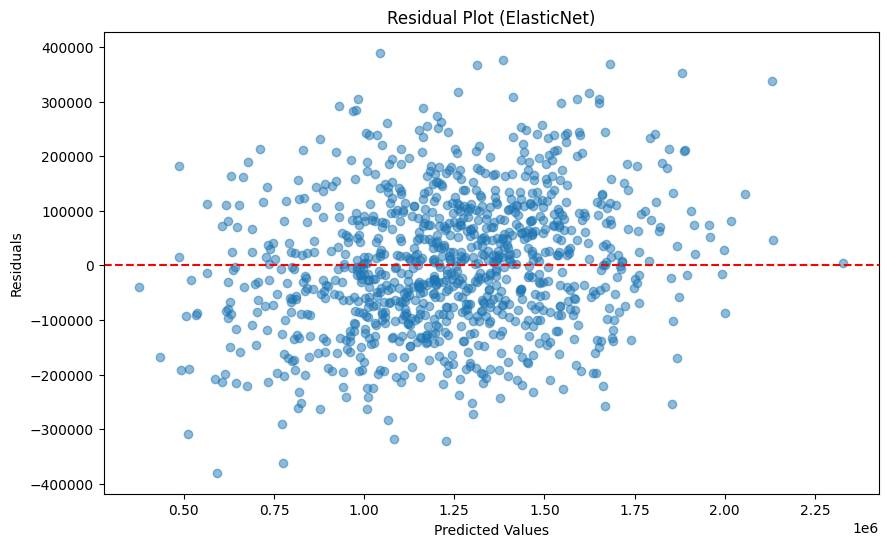

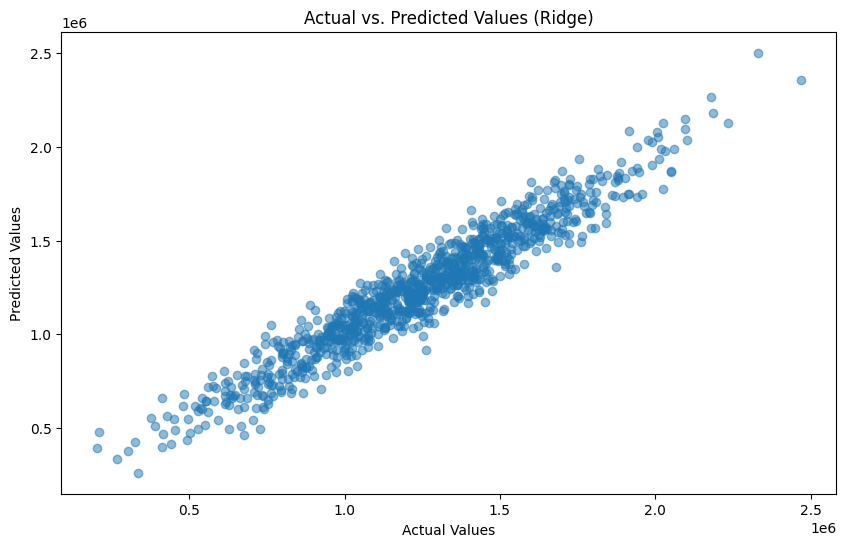

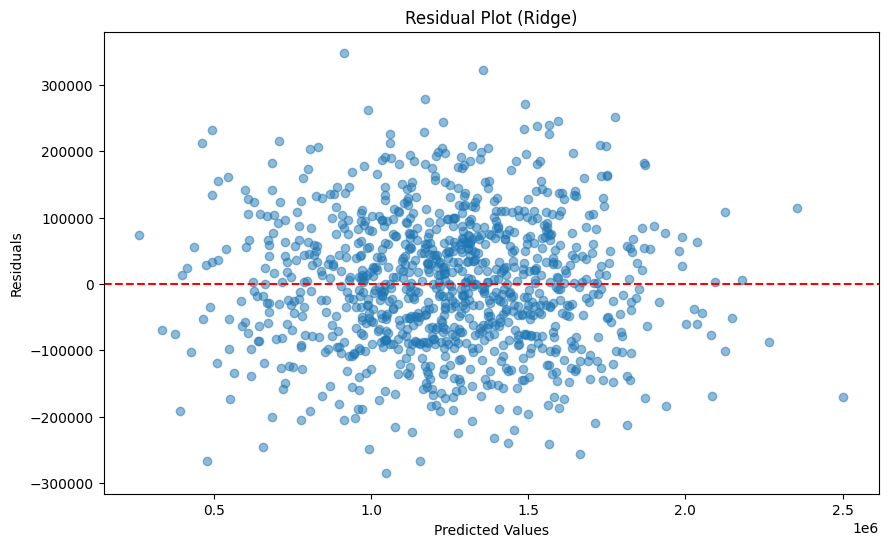

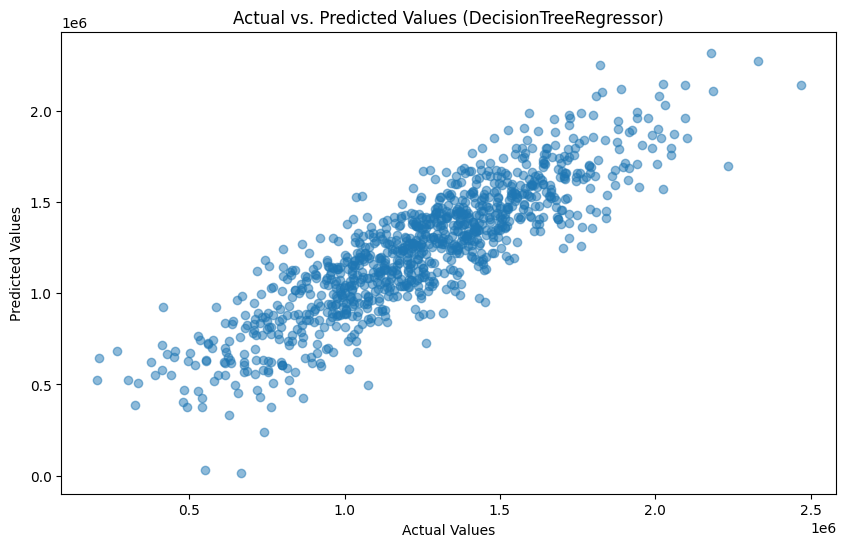

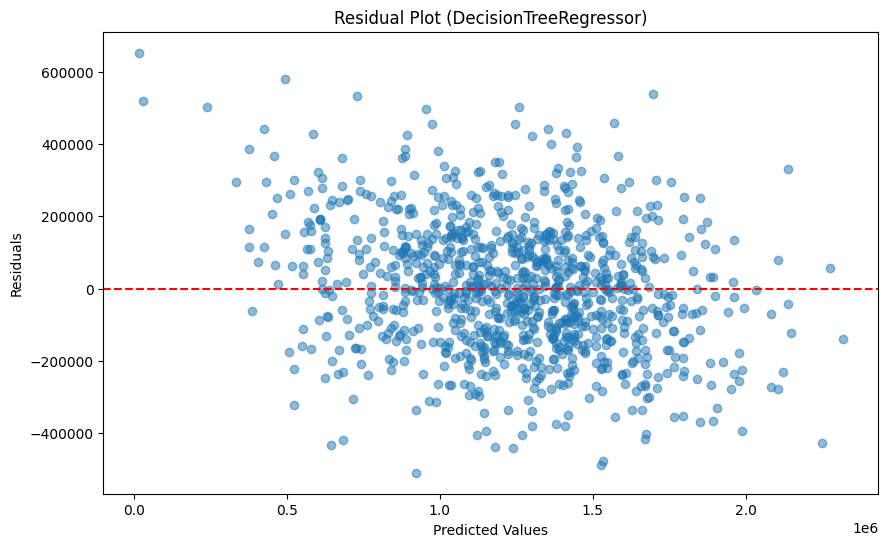

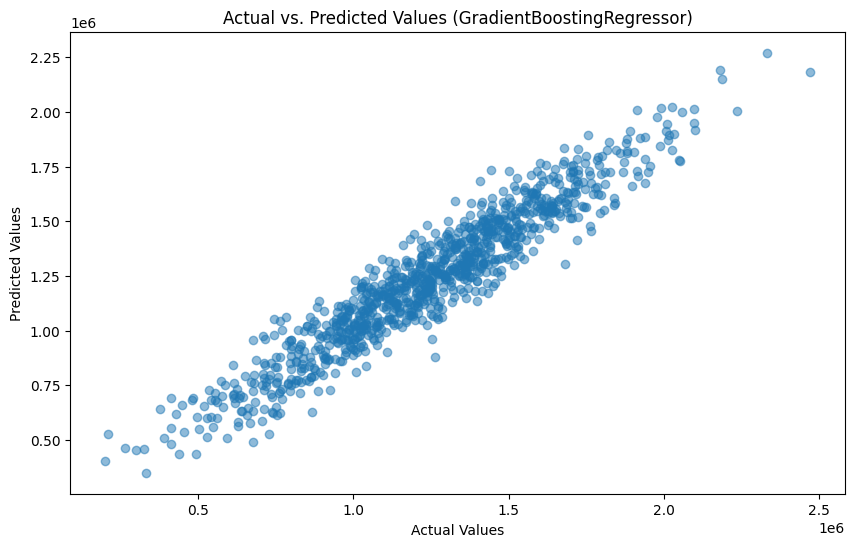

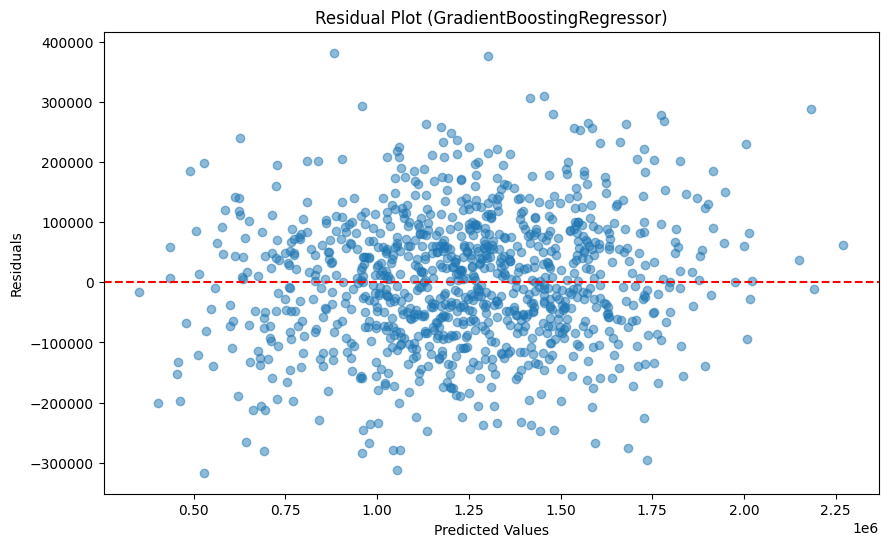

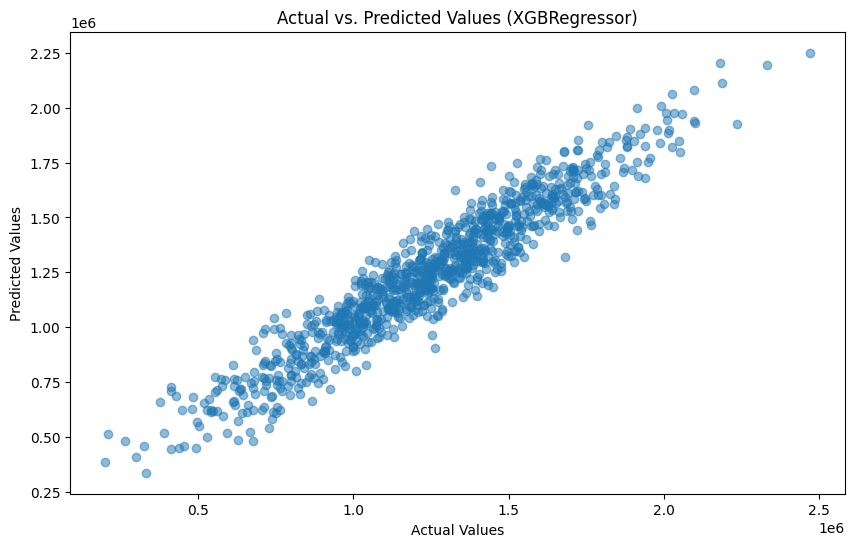

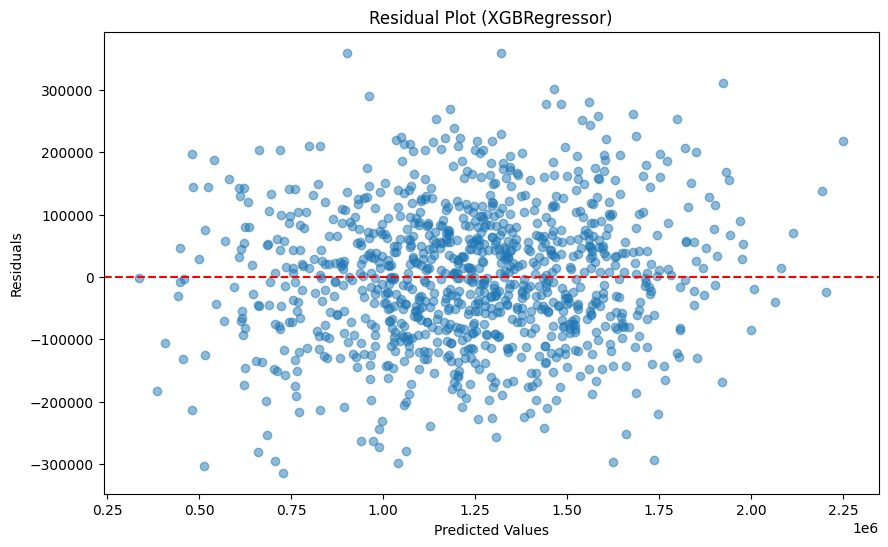

In [23]:
# Define a function to create visualizations
def visualize_model(model_name, y_test, predictions):
    # Actual vs. Predicted Scatter Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, predictions, alpha=0.5)
    plt.title(f'Actual vs. Predicted Values ({model_name})')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()

    # Residual Plot
    residuals = y_test - predictions
    plt.figure(figsize=(10, 6))
    plt.scatter(predictions, residuals, alpha=0.5)
    plt.title(f'Residual Plot ({model_name})')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.show()

# Call the visualize_model function with model name and predictions
visualize_model('Ridge', y_test, ridge_predictions)
visualize_model('Lasso', y_test, lasso_predictions)
visualize_model('ElasticNet',y_test,elastic_net_predictions)
visualize_model('Ridge',y_test, poly_predictions)
visualize_model('DecisionTreeRegressor',y_test, decision_tree_predictions)
visualize_model('GradientBoostingRegressor',y_test, gradient_boosting_predictions)
visualize_model('XGBRegressor',y_test, xgboost_predictions)